### Reddit Analysis Overview

###### Reddit Overview - Reddit is social website that allows users to post news, web content, and start discussion posts.
We will develop a model to classify the sub-reddits by the types of posts within the dataset using NLP (Natural Language Processing) techniques.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.preprocessing import Binarizer, Imputer, \
    OneHotEncoder, PolynomialFeatures, StandardScaler, \
    MinMaxScaler, RobustScaler
    
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
import statsmodels.api as sm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### loading Reddit dataset

In [2]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# setting view to widen so can display all the columns

In [3]:
df = pd.read_csv('reddit_posts.csv')

In [4]:
df.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,disable_comments,distinguished,domain,downs,edited,gilded,hide_score,href_url,id,imp_pixel,is_self,link_flair_css_class,link_flair_text,locked,media,media_embed,mobile_ad_url,name,num_comments,original_link,over_18,permalink,post_hint,preview,promoted,promoted_by,promoted_display_name,promoted_url,quarantine,retrieved_on,saved,score,secure_media,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,NaN,NaN,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,NaN,self.techsupport,0.0,False,0.0,False,NaN,5g49s2,NaN,True,NaN,NaN,False,NaN,{},NaN,t3_5g49s2,1.0,NaN,False,/r/techsupport/comments/5g49s2/help_with_audio...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I have a Sony surround sound system for a blu-...,False,False,techsupport,t5_2qioo,NaN,NaN,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,NaN,NaN,False,Silverfin113,NaN,NaN,False,1480697424,NaN,NaN,self.learnprogramming,0.0,False,0.0,False,NaN,5g4a5p,NaN,True,NaN,NaN,False,NaN,{},NaN,t3_5g4a5p,8.0,NaN,False,/r/learnprogramming/comments/5g4a5p/optimizing...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,23.0,NaN,{},I've written what seems to be a prohibitively ...,False,False,learnprogramming,t5_2r7yd,NaN,NaN,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,NaN,NaN,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,NaN,self.gamedev,0.0,False,0.0,False,NaN,5g4att,NaN,True,discussion cat-talk,Discussion,False,NaN,{},NaN,t3_5g4att,5.0,NaN,False,/r/gamedev/comments/5g4att/seeking_tales_of_de...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,12.0,NaN,{},"I'm writing an article called ""Video Games Tha...",False,False,gamedev,t5_2qi0a,NaN,NaN,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
3,NaN,NaN,False,[deleted],NaN,NaN,False,1480697634,NaN,NaN,self.learnprogramming,0.0,1480698462,0.0,False,NaN,5g4awr,NaN,True,solved,Solved,False,NaN,{},NaN,t3_5g4awr,9.0,NaN,False,/r/learnprogramming/comments/5g4awr/java_findi...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,0.0,NaN,{},[deleted],False,False,learnprogramming,t5_2r7yd,NaN,NaN,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
4,NaN,NaN,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,NaN,self.learnpython,0.0,1480709138,0.0,False,NaN,5g4bcr,NaN,True,NaN,NaN,False,NaN,{},NaN,t3_5g4bcr,12.0,NaN,False,/r/learnpython/comments/5g4bcr/currying_functi...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,6.0,NaN,{},I have the following representation of argumen...,False,False,learnpython,t5_2r8ot,NaN,NaN,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...


### Preprocessing and cleaning

In [5]:
df.info() # Viewing the types of data within the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 53 columns):
adserver_click_url        0 non-null float64
adserver_imp_pixel        0 non-null float64
archived                  26688 non-null bool
author                    26688 non-null object
author_flair_css_class    435 non-null object
author_flair_text         351 non-null object
contest_mode              26688 non-null bool
created_utc               26688 non-null int64
disable_comments          0 non-null float64
distinguished             85 non-null object
domain                    26688 non-null object
downs                     26688 non-null float64
edited                    26688 non-null object
gilded                    26688 non-null float64
hide_score                26688 non-null bool
href_url                  0 non-null float64
id                        26688 non-null object
imp_pixel                 0 non-null float64
is_self                   26688 non-null bool
link_fla

In [6]:
df.shape # 53 features/columns

(26688, 53)

In [7]:
print(df.columns)

Index(['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author', 'author_flair_css_class', 'author_flair_text', 'contest_mode', 'created_utc', 'disable_comments', 'distinguished', 'domain', 'downs', 'edited', 'gilded', 'hide_score', 'href_url', 'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text', 'locked', 'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments', 'original_link', 'over_18', 'permalink', 'post_hint', 'preview', 'promoted', 'promoted_by', 'promoted_display_name', 'promoted_url', 'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'third_party_tracking', 'third_party_tracking_2', 'thumbnail', 'title', 'ups', 'url'], dtype='object')


In [8]:
df.isnull().sum() # there are so many nulls that I'm going to drop the null columnns

adserver_click_url        26688
adserver_imp_pixel        26688
archived                      0
author                        0
author_flair_css_class    26253
author_flair_text         26337
contest_mode                  0
created_utc                   0
disable_comments          26688
distinguished             26603
domain                        0
downs                         0
edited                        0
gilded                        0
hide_score                    0
href_url                  26688
id                            0
imp_pixel                 26688
is_self                       0
link_flair_css_class      22396
link_flair_text           22078
locked                        0
media                     26420
media_embed                   0
mobile_ad_url             26688
name                          0
num_comments                  0
original_link             26688
over_18                       0
permalink                     0
post_hint                 23175
preview 

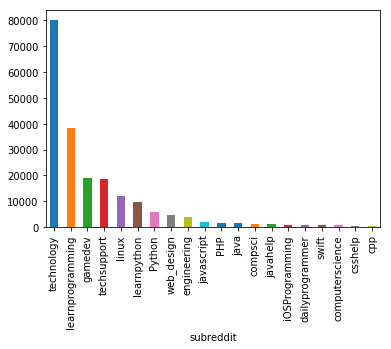

In [9]:
df.groupby(by='subreddit',axis=0).ups.sum().sort_values(ascending=False)[0:20].plot(kind='bar')
# viewing the top sub reddits for this cateogry

In [10]:
df.subreddit.unique()
# viewing all unique values within the subreddit feature

array(['techsupport', 'learnprogramming', 'gamedev', 'learnpython',
       'Python', 'linux', 'technology', 'javahelp', 'computerscience',
       'csshelp', 'programming', 'swift', 'HTML', 'css', 'engineering',
       'web_design', 'netsec', 'javascript', 'iOSProgramming', 'jquery',
       'java', 'cpp', 'flask', 'html5', 'perl', 'PHP', 'django', 'compsci',
       'ruby', 'coding', 'inventwithpython', 'pygame', 'dailyprogrammer',
       'programmer', 'IPython', 'lisp', 'pystats', 'pythoncoding'], dtype=object)

In [11]:
python_sbr = ['learnpython', 'Python', 'inventwithpython', 'pygame', 'IPython', 'pystats', 'pythoncoding']
# grouping the python subreddits into one variable

In [12]:
df = df.drop(df[df['selftext']== '[deleted]'].index)
df = df.drop(df[df['selftext']== '[removed]'].index)
# deleting '[removed]' and '[deleted]' under the selftext column.

In [13]:
df.dropna(axis=1, inplace=True)
# dropping all null values as I won't be using the other columns in my model

In [14]:
X = df[['selftext']]

y = df['subreddit'].map(lambda x: 1 if x in python_sbr else 0)

# setting my features and my target variable and binarizing the target variable for NLP

In [15]:
X.shape

(18208, 1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
# Train-test split the data

In [17]:
print(X_train.shape)
print(y_train.shape)
# making sure the shape looks good for my training data

(12199, 1)
(12199,)


In [18]:
(X_train['selftext'] == '[deleted]').value_counts()
# Viewing the value counts for the selftext column on "deleted" values

False    12199
Name: selftext, dtype: int64

In [19]:
(X_train['selftext'] == '[removed]').value_counts()

False    12199
Name: selftext, dtype: int64

In [20]:
X_train.head()

,selftext
12522,"First, I looked through previous posts here an..."
26422,"Hey guys, \r\n\r\nI would say that I'm an inte..."
12832,I have just started learning JQuery. I downloa...
20665,I could really use some guidance at the moment...
11857,I bought a new charger for my ASUS G55VW lapto...


In [21]:
X_train.describe()

,selftext
count,12199
unique,12126
top,Welcome to the daily [Advent Of Code](http://a...
freq,17


In [22]:
X_train.shape

(12199, 1)

In [23]:
X_train.head()

,selftext
12522,"First, I looked through previous posts here an..."
26422,"Hey guys, \r\n\r\nI would say that I'm an inte..."
12832,I have just started learning JQuery. I downloa...
20665,I could really use some guidance at the moment...
11857,I bought a new charger for my ASUS G55VW lapto...


In [24]:
X_train.isnull().sum()

selftext    0
dtype: int64

## Initializing the CountVectorizer to start model

In [25]:
cv = CountVectorizer(stop_words='english',min_df=.001)
cv.fit(df['selftext'])
# Initializing a Count Vectorizer model, including stop_words, and to ignore terms that appear less than 1% of the documents

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.001,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
count_vec = pd.DataFrame(cv.fit_transform(df['selftext']).todense(), columns=cv.get_feature_names())
# Creating a dataframe off the all the count vectorizer features

In [27]:
count_vec.head()

,00,000,00ghz,01,02,03,04,05,0500,06,07,08,09,0ghz,10,100,1000,10000,101,1050,1060,1070,1080,1080p,11,110,1151,1155,12,120,1200,120gb,123,127,128,128gb,12gb,12v,13,130,1333mhz,14,14393,144,1440p,144hz,15,150,16,1600,1600mhz,1607,168,16gb,17,170,18,1866,19,192,1920x1080,1gb,1px,1st,1tb,1x,20,200,2000,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,20ghz,21,212,2133,2133mhz,22,23,24,240,2400,240gb,25,250,2500k,250gb,255,256,256gb,26,2600k,27,270,270x,28,280,280x,29,290,2d,2gb,2ghz,2nd,2tb,2x,2x4gb,2x8gb,30,300,3000,31,32,32gb,33,34,35,3570k,36,360,37,376,3770,3770k,38,380,39,390,3d,3gb,3ghz,3rd,3tb,3x,40,400,4000,40ghz,41,42,43,44,4460,447,45,450,46,460,4670k,469050313cd1263e64befb8b35862aa1,4690k,470,4770k,4790,4790k,48,480,49,4g,4gb,4ghz,4k,4tb,4th,50,500,5000,500gb,500w,50ghz,51,512,512gb,52,53,530,54,55,550,550w,56,57,576,58,59,5e3ssz,5ghz,5mm,60,600,600w,60fps,60ghz,60hz,6100,62,63,6300,64,6400,64bit,64gb,65,650,6500,650w,66,660,6600,6600k,6700,6700hq,6700k,69,6gb,6ghz,6th,70,700,7200,7200rpm,720p,74,75,750,750w,760,7601,77,770,78,780,79,7ghz,80,800,802,81,82,83,8320,8350,84,...,util,utilities,utility,utilize,v1,v2,v3,vague,valid,validation,valuable,value,values,vanilla,var,variable,variables,variations,variety,various,vary,vc,ve,vector,vectors,vendor,vengeance,ver,verification,verified,verify,verizon,versa,version,versions,versus,vertical,vertically,vga,vi,viable,vice,vid,video,videos,view,viewer,viewing,views,viii,vim,virtual,virus,viruses,visible,visit,visiting,vista,visual,visually,vlc,vm,voice,void,voltage,volume,volumes,vote,vpn,vr,vram,vs,w10,wait,waited,waiting,wake,waking,walk,walking,wall,walls,wan,wanna,want,wanted,wanting,wants,war,warcraft,warm,warner,warning,warnings,warranty,wasn,wasnt,waste,wasted,wasting,watch,watched,watching,water,watt,wattage,watts,wave,way,ways,wd,wd10ezex,weak,weather,web,webcam,webkit,webpack,webpage,webpages,website,websites,week,weekend,weekly,weeks,weight,weird,welcome,went,weren,western,whatnot,whats,whatsoever,wheel,whilst,white,wi,wide,widget,width,wife,wifi,wiki,wikipedia,willing,win,win10,win32,win7,win8,window,windowed,windows,windows10,winter,wipe,wiped,wiping,wire,wired,wireless,wirelessly,wires,wiring,wise,wish,witcher,wits,wizard,wlan,woke,won,wonder,wondered,wonderful,wondering,wont,word,wordpress,words,work,workaround,worked,workflow,working,works,workstation,world,worried,worry,worrying,worse,worst,worth,wouldn,wouldnt,wow,wp,wrap,wrapper,write,writer,writes,writing,written,wrong,wrote,wtf,www,x1,x16,x2,x4,x64,x86,x99,xbox,xcode,xeon,xfinity,xfx,xmas,xml,xp,xps,yahoo,yeah,year,years,yellow,yes,yesterday,yoga,young,youtu,youtube,z170,z170a,z170x,z77,z87,z97,z97x,zero,zip,zone,zoom,zotac
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
print(count_vec.sum().sort_values(ascending=False).head(10))
# Here we can see the frequency of words within the "selftext" column.

just        8487
windows     8088
com         7557
like        7466
ve          7185
gt          6186
help        5266
computer    5254
time        5195
know        5170
dtype: int64


In [29]:
print(count_vec.shape)

(18208, 4777)


## Using dimensionality reduction to reduce dimensionality of features in the CountVectorizer Model through TruncatedSVD

In [30]:
svd = TruncatedSVD(n_components=1000)
# originally started off with 4000 components but then went to 1000 after plotting the variance
tsvd = svd.fit_transform(count_vec)

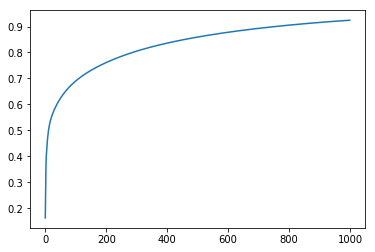

In [31]:
plt.plot(range(1000), svd.explained_variance_ratio_.cumsum())

In [32]:
svd_df = pd.DataFrame(svd.fit_transform(count_vec))

In [33]:
svd_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.002323,0.032102,0.020959,0.125602,-0.347985,-0.021773,-0.168440,0.074580,0.022896,-0.094924,-0.156250,-0.195660,0.041771,-0.150694,-0.117645,-0.020980,-0.018154,0.065245,0.014079,0.042649,-0.017669,0.000736,0.072817,0.131631,0.030949,0.064996,-0.223139,0.023444,-0.023460,-0.026800,0.203048,-0.093924,-0.026172,-0.246444,-0.018864,-0.097525,-0.091821,-0.154171,0.283840,0.053257,-0.024691,0.024831,0.319285,-0.375246,-0.047501,0.070396,0.042340,-0.101470,0.209876,-0.402334,0.030116,0.076438,-0.224015,-0.479550,0.139441,-0.269313,0.038513,0.055052,0.406199,0.199215,-0.195705,-0.108674,-0.132003,-0.261430,0.427472,-0.160880,-0.291998,-0.106691,0.256215,0.468916,0.244207,0.490163,0.172760,0.105042,0.106334,0.024808,-0.465194,-0.022105,0.078077,-0.136060,0.092662,0.349342,-0.339349,-0.036303,-0.050745,-0.214819,-0.197378,-0.064641,-0.196084,-0.114537,0.238349,0.193731,0.292691,0.095405,-0.097341,-0.063270,-0.213850,-0.232803,0.115230,-0.451150,-0.094739,-0.284835,-0.090733,0.022986,-0.374081,-0.159103,0.117470,0.173451,-0.127391,0.088309,-0.010619,0.123834,-0.084678,-0.167728,0.128778,-0.015415,0.228060,0.313389,-0.066929,0.390609,0.158005,0.029903,0.111221,-0.116305,-0.090644,0.252084,0.148386,-0.043116,-0.062230,0.044747,0.038206,0.021686,-0.105740,-0.025977,0.338965,0.040145,0.024978,0.062359,-0.141344,-0.198907,0.157402,-0.180310,-0.127768,-0.129227,-0.014198,0.099035,-0.034484,0.096039,0.060116,-0.112895,-0.022403,-0.036478,0.032245,-0.094612,0.086420,-0.064149,0.008196,0.091808,0.000440,-0.062591,0.048745,0.131407,0.107214,-0.083480,-0.017995,0.026624,-0.051345,-0.168995,-0.076106,-0.061763,0.084429,0.093912,0.146469,-0.064714,0.239261,-0.099672,-0.104413,-0.015892,-0.088636,-0.086953,-0.126160,-0.028885,0.075073,0.007859,0.059870,-0.010643,-0.149951,0.030750,-0.085247,0.000844,-0.039102,-0.078572,0.144705,-0.112496,0.217473,0.102764,0.079194,0.071802,0.101029,-0.163469,-0.085197,-0.112334,-0.008619,0.182429,-0.102290,-0.179713,-0.031995,0.038717,0.121781,0.023089,0.068577,-0.206954,-0.080290,-0.110592,0.209289,0.042393,-0.196974,-0.072049,0.090096,0.029137,-0.167344

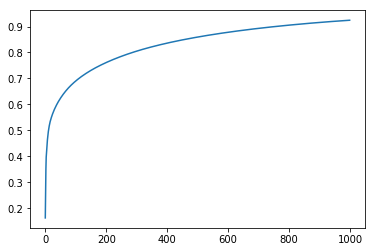

In [34]:
plt.plot(range(1000),svd.explained_variance_ratio_.cumsum())

In [35]:
X_new = tsvd # assigning the X variable
y_new = y # assigning the Y variable

In [36]:
X_new.shape

(18208, 1000)

In [37]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33)

In [38]:
print(X_train.dtype)

float64


In [39]:
# Viewing value counts to determine baseline
y_new.value_counts()

0    16460
1     1748
Name: subreddit, dtype: int64

In [40]:
y_train.value_counts()

0    11002
1     1197
Name: subreddit, dtype: int64

In [41]:
baseline = 16460/(16460 + 1748)
print('baseline accuracy is:', baseline)

baseline accuracy is: 0.9039982425307557


## Let's start modelling, trying out random forest classifier

In [42]:
# Creating an instance of Random Forest Classifier model and fitting the data to it
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:

rf.score(X_train, y_train)# looks like it may over fit

0.98786785802114929

In [44]:
# creating the predictions off the training data
train_predictions = rf.predict(X_train)

In [45]:
print(confusion_matrix(y_train, train_predictions))
print('\n')
print(classification_report(y_train, train_predictions))# very few false positives and false negatives with training data

[[10999     3]
 [  145  1052]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99     11002
          1       1.00      0.88      0.93      1197

avg / total       0.99      0.99      0.99     12199



In [46]:
print(rf.score(X_test, y_test)) # not much better than baseline!

0.911965385255


In [47]:
test_predictions = rf.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print('\n')
print(classification_report(y_test, test_predictions))
# there are 41 false positives and 510 false negatives

[[5413   45]
 [ 484   67]]


             precision    recall  f1-score   support

          0       0.92      0.99      0.95      5458
          1       0.60      0.12      0.20       551

avg / total       0.89      0.91      0.88      6009



## Let's try using a Support Vector Machine classification model

In [48]:
svm = SVC()
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svm.score(X_train, y_train)

0.92983031396016069

In [50]:
svm_train_pred = svm.predict(X_train)
print(confusion_matrix(y_train, svm_train_pred))

[[10946    56]
 [  800   397]]


In [51]:
print(classification_report(y_train, train_predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     11002
          1       1.00      0.88      0.93      1197

avg / total       0.99      0.99      0.99     12199



In [52]:
svm.score(X_test, y_test) # slightly better than the last model,this works!

0.92860708936595104

In [53]:
from sklearn.metrics import recall_score
print(recall_score(y_train, train_predictions)) 
# the recall score is high on this model so it maybe not a bad choice.

0.878863826232


## checking predictions for test data

In [54]:
svm_test_pred = svm.predict(X_test)
df2 = pd.DataFrame(confusion_matrix(y_test, svm_test_pred), columns=['predicted No', 'Predicted Yes'], 
                   index=['Actual No', 'Actual Yes'])


In [55]:
df2

,predicted No,Predicted Yes
Actual No,5425,33
Actual Yes,396,155


In [56]:
print(classification_report(y_test, svm_test_pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      5458
          1       0.82      0.28      0.42       551

avg / total       0.92      0.93      0.91      6009



In [57]:

from sklearn.metrics import recall_score

print(recall_score(y_test, svm_test_pred))

0.281306715064


In [58]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, svm_test_pred))
# Our model is 93% accurate in predicting the test data, 
# From the recall & precision scores of this model we can determine that it has low false positive & low false negative rate.
# This model would be best option yet for classifyiing reddit posts.

0.928607089366
